## **IMPORTANDO BASE DE DADOS**

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/water_potability.csv')

dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# **DEFININDO FUNÇÕES:**

In [ ]:
def media_truncada(feature, porcentagem = 0.1):
  # Definindo o início e o fim dos valores que serão usados para fazer a média truncada
  inicio_truncada = round(porcentagem * dataset[str(feature)].count())
  fim_truncada = round(dataset[str(feature)].count() - inicio_truncada)
  dados_media_truncada = []

  # Criando uma lista com os valores para o cálculo
  for i in range(len(dataset[str(feature)].values)):
    if i>=inicio_truncada and i<=fim_truncada:
      dados_media_truncada.append(dataset[str(feature)][i])
  
  # Fazendo a soma dos valores
  soma = 0
  for i in dados_media_truncada:
    soma = soma + i

  # Retorna a média da lista criada (Média Truncada)
  return soma/len(dados_media_truncada)

In [ ]:
def variancia(feature):
  lista_diferenca = []

  # Cria lista com a diferença entre cada elemento pela média, e depois eleva ao quadrado
  for i in dataset[str(feature)].values:
    diferenca = (i-dataset[str(feature)].mean())**2
    lista_diferenca.append(diferenca)

  # Soma de cada resultado da diferença 
  soma = 0
  for i in lista_diferenca:
    soma = soma + i

  # Retorna a soma dividido pela quantidade de elementos 
  return soma/(len(lista_diferenca)-1)

In [ ]:
def momento(feature, expoente):
  lista_diferenca = []

  # Faz a diferença entre cada elemento e a média, e depois eleva o número ao expoente
  for i in dataset[str(feature)].values:
    diferenca = (i-dataset[str(feature)].mean())**expoente
    lista_diferenca.append(diferenca)

  # Soma cada resultado da diferença
  soma = 0
  for i in lista_diferenca:
    soma = soma + 1
  
  # Dependendo do expoente escolhido, a fórmula muda
  if expoente == 3:
    return soma/((len(lista_diferenca)-1)*(dataset[str(feature)].std())**3)
  elif expoente == 4:
    return (soma/((len(lista_diferenca)-1)*(dataset[str(feature)].std())**4))-3
  else:
    return soma/(len(lista_diferenca)-1)

In [ ]:
def plot_linha(titulo, grafico1=None, grafico2=None, grafico3=None):
  plt.figure(figsize=(15,8))
  if grafico1 != None and grafico2 != None and grafico3 != None:
    df_dadosUnivariados.iloc[grafico1].plot()
    df_dadosUnivariados.iloc[grafico2].plot()
    df_dadosUnivariados.iloc[grafico3].plot()
  elif grafico1 != None and grafico2 != None:
    df_dadosUnivariados.iloc[grafico1].plot()
    df_dadosUnivariados.iloc[grafico2].plot()
  elif grafico1 != None:
    df_dadosUnivariados.iloc[grafico1].plot()

  plt.legend()
  plt.xlabel('Colunas')
  plt.ylabel('Escala')
  plt.title(titulo)

In [ ]:
def plot_coluna(titulo=None, coluna1=None, coluna2=None):
  plt.figure(figsize=(12,8))
  if coluna1!=None and coluna2!=None:
    plt.plot(df_dadosUnivariados[coluna1], label=coluna1)
    plt.plot(df_dadosUnivariados[coluna2], label=coluna2)
  elif coluna1!=None:
    plt.plot(df_dadosUnivariados[coluna1], label=coluna1)

  plt.legend()
  plt.xlabel('Medidas')
  plt.ylabel('Escala')
  
  if titulo!=None:
    plt.title(titulo)

In [ ]:
def plot_distribuicao(feature):
  plt.figure(figsize=(18,8))
  plt.title('Distribuição Normal ' + str(feature))
  sns.distplot(dataset[feature])

In [ ]:
def plot_boxplot(feature):
  plt.figure(figsize=(5,11))
  dataset.boxplot(feature)

# **EXPLORAÇÃO DE DADOS PARA DADOS UNIVARIADOS**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#quantos valores estavam faltando?
dataset.fillna({'ph':dataset.ph.mean()}, inplace=True)
dataset.fillna({'Sulfate':dataset.Sulfate.mean()}, inplace=True)
dataset.fillna({'Trihalomethanes':dataset.Trihalomethanes.mean()}, inplace=True)

#dataset.isnull().sum()

In [ ]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## **ph:**

#### MEDIDAS DE LOCALIDADE
- Definem pontos de referência nos dados.

In [ ]:
ph_media = dataset.mean().ph #mais sensível a presença de outliers
ph_mediana = np.percentile(dataset.ph.values.tolist(), 50) #menos sensível a presença de outliers
ph_mediaTruncada_10 = media_truncada('ph') #outra métrica para calcular medida central que é menos sensível a presença de outliers

#### MEDIDAS DE ESPALHAMENTO:
- Medem a dispersão de um conjunto de valores

In [ ]:
ph_intervalo = dataset['ph'].max() - dataset['ph'].min() # mostra o espalhamento máximo entre os valores do conjunto
ph_variancia = variancia('ph') # a medida mais utilizada para avaliar o espalhamento dos dados
ph_desvioPadrao = dataset.std().ph # medida de dispersão em torno da média

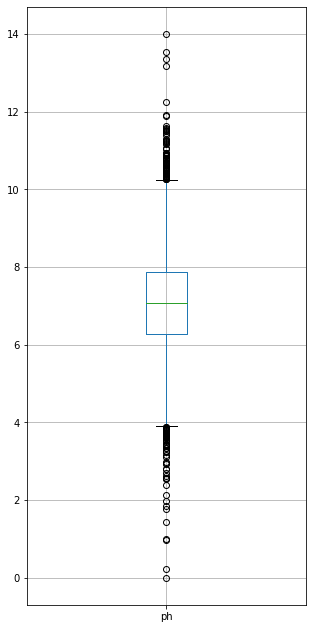

In [ ]:
plot_boxplot('ph')

#### MEDIDAS DE DISTRIBUIÇÃO:
- Medidas que mostram como os valores do conjunto estão distribuídos

In [ ]:
ph_obliquidade = momento('ph', 3) # mede a simetria da distribuição dos dados em torno da média
ph_curtose = momento('ph', 4) # medida de dispersão que captura o achatamento da função de distribuição

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


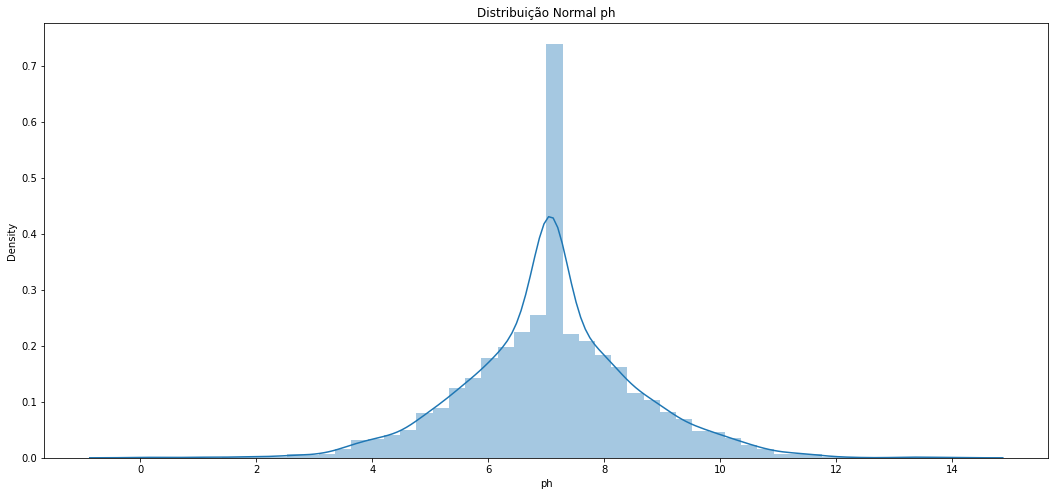

In [ ]:
plot_distribuicao('ph')

## **Hardness:**

#### MEDIDAS DE LOCALIDADE
- Definem pontos de referência nos dados.

In [ ]:
hardness_media = dataset.mean().Hardness
hardness_mediana = np.percentile(dataset.Hardness.values.tolist(), 50)
hardness_mediaTruncada_10 = media_truncada('Hardness')

#### MEDIDAS DE ESPALHAMENTO:
- Medem a dispersão de um conjunto de valores

In [ ]:
hardness_intervalo = dataset['Hardness'].max() - dataset['Hardness'].min()
hardness_variancia = variancia('Hardness')
hardness_desvioPadrao = dataset.std().Hardness

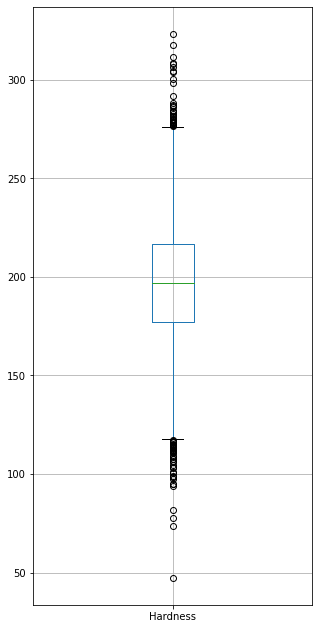

In [ ]:
plot_boxplot('Hardness')

#### MEDIDAS DE DISTRIBUIÇÃO:
- Medidas que mostram como os valores do conjunto estão distribuídos

In [ ]:
hardness_obliquidade = momento('Hardness', 3)
hardness_curtose = momento('Hardness', 4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


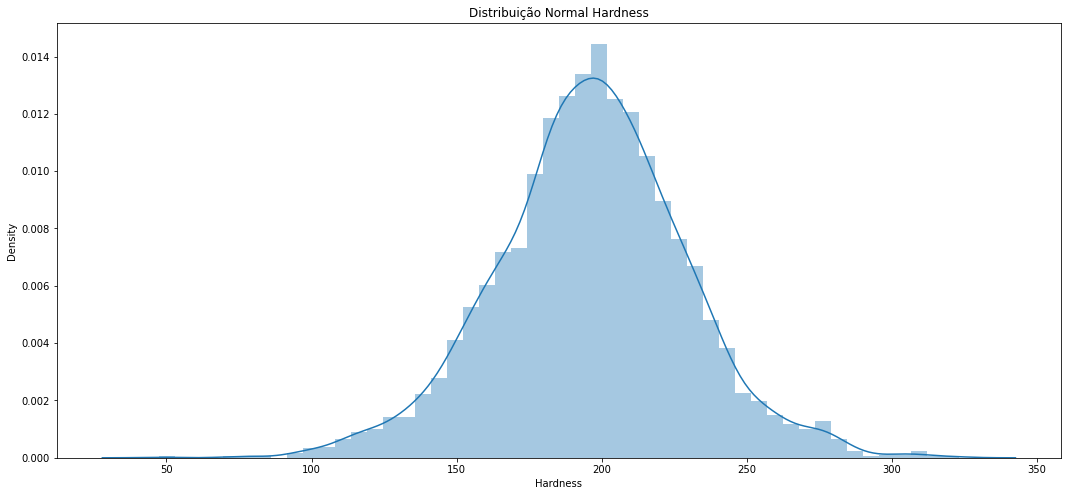

In [ ]:
plot_distribuicao('Hardness')

## **Solids:**

#### MEDIDAS DE LOCALIDADE
- Definem pontos de referência nos dados.

In [ ]:
solids_media = dataset.mean().Solids
solids_mediana = np.percentile(dataset.Solids.values.tolist(), 50)
solids_mediaTruncada = media_truncada('Solids')

#### MEDIDAS DE ESPALHAMENTO:
- Medem a dispersão de um conjunto de valores

In [ ]:
solids_intervalo = dataset['Solids'].max() - dataset['Solids'].min()
solids_variancia = variancia('Solids')
solids_DesvioPadrao = dataset.std().Solids

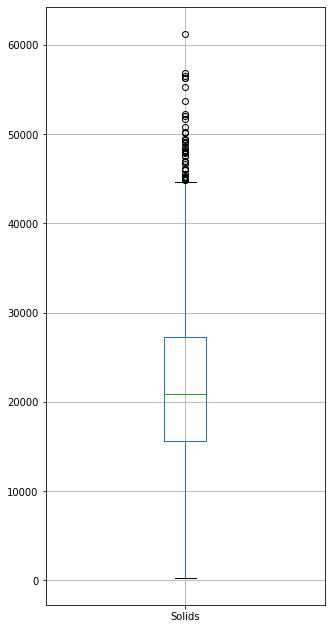

In [ ]:
plot_boxplot('Solids')

#### MEDIDAS DE DISTRIBUIÇÃO:
- Medidas que mostram como os valores do conjunto estão distribuídos

In [ ]:
solids_obliquidade = momento('Solids', 3)
solids_curtose = momento('Solids', 4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


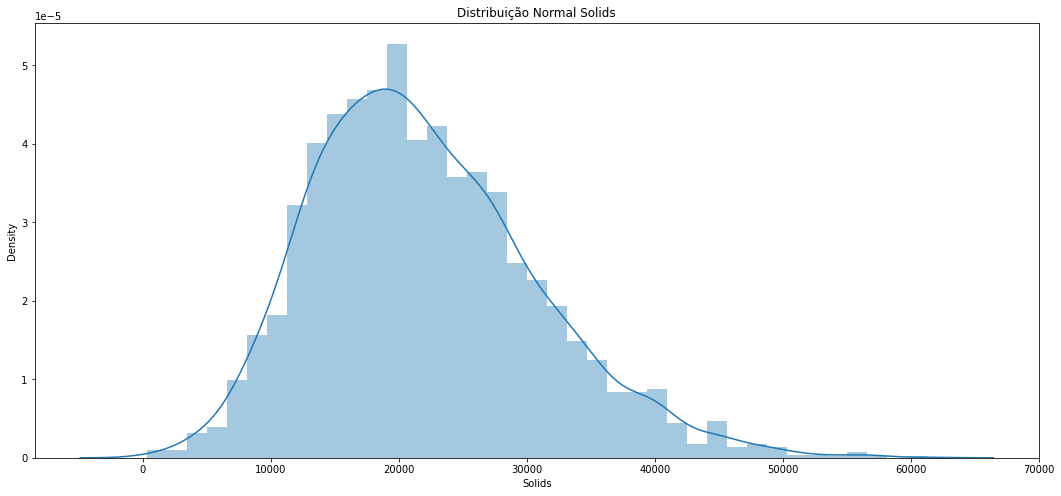

In [ ]:
plot_distribuicao('Solids')

## **Chloramines:**

#### MEDIDAS DE LOCALIDADE
- Definem pontos de referência nos dados.

In [ ]:
chloramines_media = dataset['Chloramines'].mean()
chloramines_mediana = np.percentile(dataset.Chloramines.values.tolist(), 50)
chloramines_mediaTruncada = media_truncada('Chloramines')

#### MEDIDAS DE ESPALHAMENTO:
- Medem a dispersão de um conjunto de valores

In [ ]:
chloramines_intervalo = dataset['Chloramines'].max() - dataset['Chloramines'].min()
chloramines_variancia = variancia('Chloramines')
chloramines_desvioPadrao = dataset.std().Chloramines

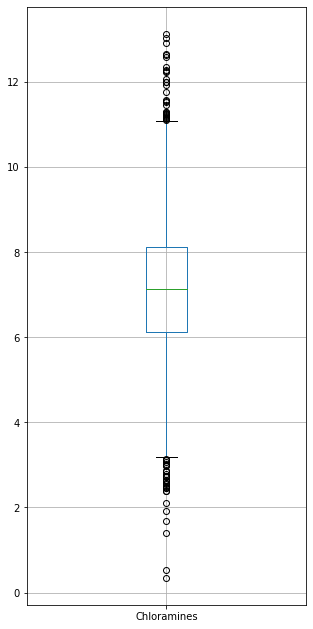

In [ ]:
plot_boxplot('Chloramines')

#### MEDIDAS DE DISTRIBUIÇÃO:
- Medidas que mostram como os valores do conjunto estão distribuídos

In [ ]:
chloramines_obliquidade = momento('Chloramines', 3)
chloramines__curtose = momento('Chloramines', 4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


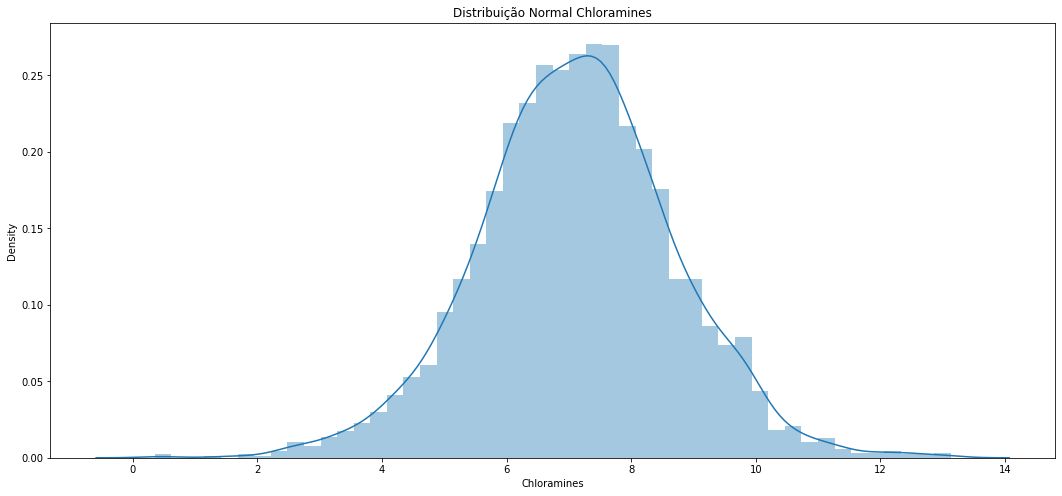

In [ ]:
plot_distribuicao('Chloramines')

## **Sulfate:**

#### MEDIDAS DE LOCALIDADE
- Definem pontos de referência nos dados.

In [ ]:
sulfate_media = dataset['Sulfate'].mean()
sulfate_mediana = np.percentile(dataset.Sulfate.values.tolist(), 50)
sulfate_mediaTruncada = media_truncada('Sulfate')

#### MEDIDAS DE ESPALHAMENTO:
- Medem a dispersão de um conjunto de valores

In [ ]:
sulfate_intervalo = dataset['Sulfate'].max() - dataset['Sulfate'].min()
sulfate_variancia = variancia('Sulfate')
sulfate_desvioPadrao = dataset.std().Sulfate

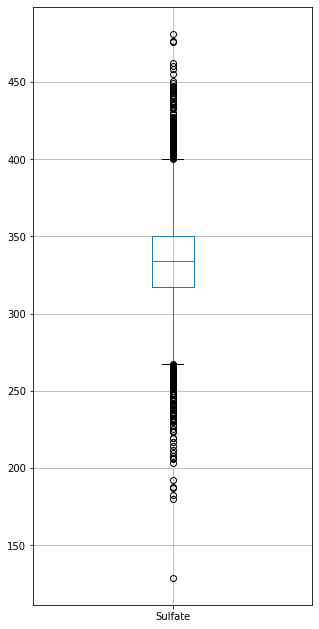

In [ ]:
plot_boxplot('Sulfate')

#### MEDIDAS DE DISTRIBUIÇÃO:
- Medidas que mostram como os valores do conjunto estão distribuídos

In [ ]:
sulfate_obliquidade = momento('Sulfate', 3)
sulfate_curtose = momento('Sulfate', 4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


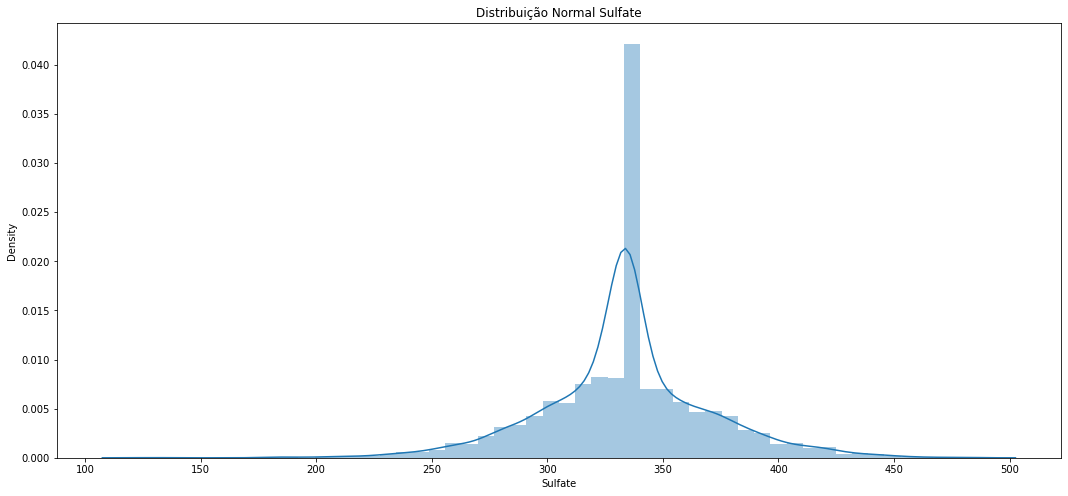

In [ ]:
plot_distribuicao('Sulfate')

## **Conductivity:**

#### MEDIDAS DE LOCALIDADE
- Definem pontos de referência nos dados.

In [ ]:
conductivity_media = dataset['Conductivity'].mean()
conductivity_mediana = np.percentile(dataset.Conductivity.values.tolist(), 50)
conductivity_mediaTruncada = media_truncada('Conductivity')

#### MEDIDAS DE ESPALHAMENTO:
- Medem a dispersão de um conjunto de valores

In [ ]:
conductivity_intervalo = dataset['Conductivity'].max() - dataset['Conductivity'].min()
conductivity_variancia = variancia('Conductivity')
conductivity_desvioPadrao = dataset.std().Conductivity

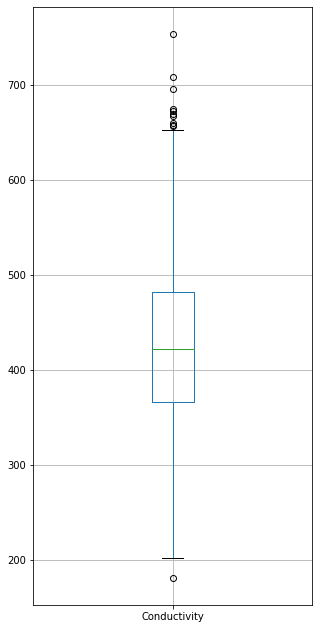

In [ ]:
plot_boxplot('Conductivity')

#### MEDIDAS DE DISTRIBUIÇÃO:
- Medidas que mostram como os valores do conjunto estão distribuídos

In [ ]:
conductivity_obliquidade = momento('Conductivity', 3) 
conductivity_curtose = momento('Conductivity', 4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


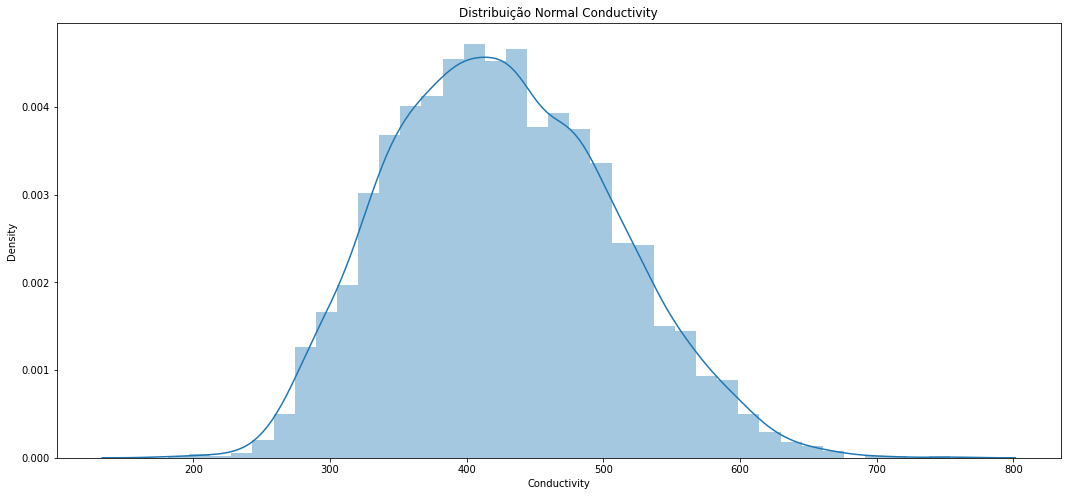

In [ ]:
plot_distribuicao('Conductivity')

## **Organic Carbon:**

#### MEDIDAS DE LOCALIDADE
- Definem pontos de referência nos dados.

In [ ]:
organicCarbon_media = dataset['Organic_carbon'].mean()
organicCarbon_mediana = np.percentile(dataset.Organic_carbon.values.tolist(), 50)
organicCarbon_mediaTruncada = media_truncada('Organic_carbon')

#### MEDIDAS DE ESPALHAMENTO:
- Medem a dispersão de um conjunto de valores

In [ ]:
organicCarbon_intervalo = dataset['Organic_carbon'].max() - dataset['Organic_carbon'].min()
organicCarbon_variancia = variancia('Organic_carbon')
organicCarbon_desvioPadrao = dataset.std().Organic_carbon

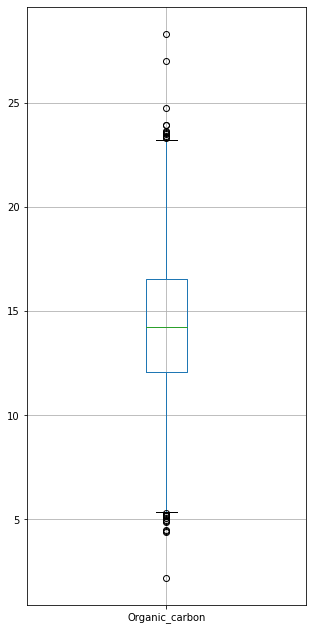

In [ ]:
plot_boxplot('Organic_carbon')

#### MEDIDAS DE DISTRIBUIÇÃO:
- Medidas que mostram como os valores do conjunto estão distribuídos

In [ ]:
organicCarbon_obliquidade = momento('Organic_carbon', 3)
organicCarbon_curtose = momento('Organic_carbon', 4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


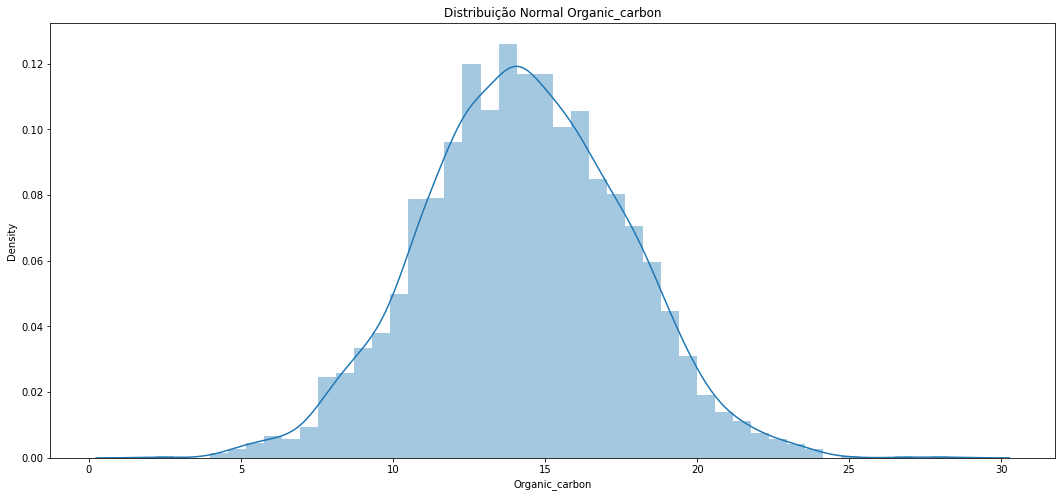

In [ ]:
plot_distribuicao('Organic_carbon')

## **Trihalomethanes:**

#### MEDIDAS DE LOCALIDADE
- Definem pontos de referência nos dados.

In [ ]:
trihalomethanes_media = dataset['Trihalomethanes'].mean()
trihalomethanes_mediana = np.percentile(dataset.Trihalomethanes.values.tolist(), 50)
trihalomethanes_mediaTruncada = media_truncada('Trihalomethanes')

#### MEDIDAS DE ESPALHAMENTO:
- Medem a dispersão de um conjunto de valores

In [ ]:
trihalomethanes_intervalo = dataset['Trihalomethanes'].max() - dataset['Trihalomethanes'].min()
trihalomethanes_variancia = variancia('Trihalomethanes')
trihalomethanes_desvioPadrao = dataset.std().Trihalomethanes

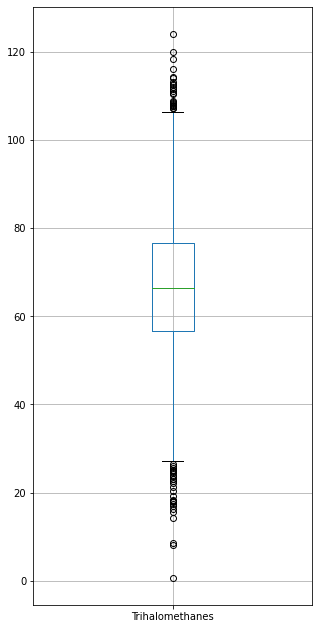

In [ ]:
plot_boxplot('Trihalomethanes')

#### MEDIDAS DE DISTRIBUIÇÃO:
- Medidas que mostram como os valores do conjunto estão distribuídos

In [ ]:
trihalomethanes_obliquidade = momento('Trihalomethanes', 3)
trihalomethanes_curtose = momento('Trihalomethanes', 4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


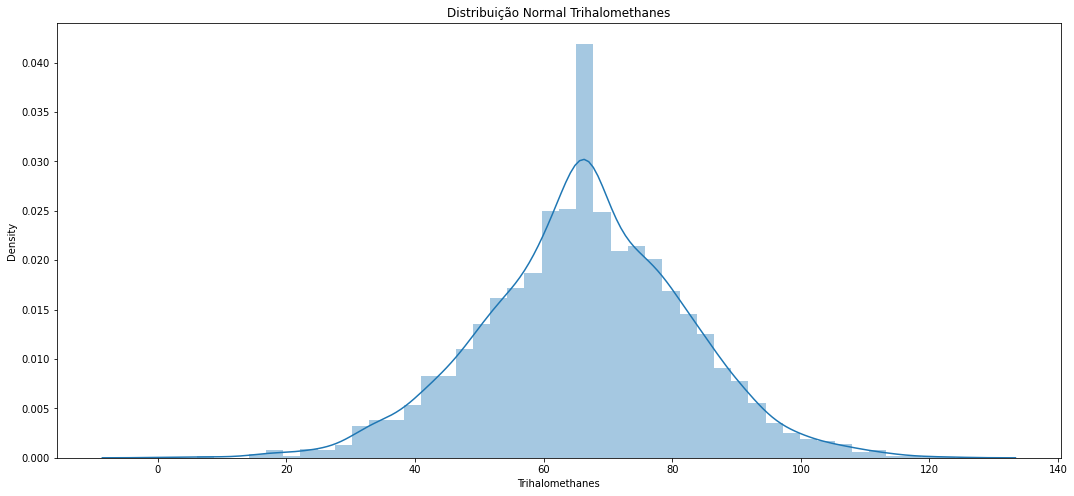

In [ ]:
plot_distribuicao('Trihalomethanes')

## **Turbidity:**

#### MEDIDAS DE LOCALIDADE
- Definem pontos de referência nos dados.

In [ ]:
turbidity_media = dataset['Turbidity'].mean()
turbidity_mediana = np.percentile(dataset.Turbidity.values.tolist(), 50)
turbidity_mediaTruncada = media_truncada('Turbidity')

#### MEDIDAS DE ESPALHAMENTO:
- Medem a dispersão de um conjunto de valores

In [ ]:
turbidity_intervalo = dataset['Turbidity'].max() - dataset['Turbidity'].min()
turbidity_variancia = variancia('Turbidity')
turbidity_desvioPadrao = dataset.std().Turbidity

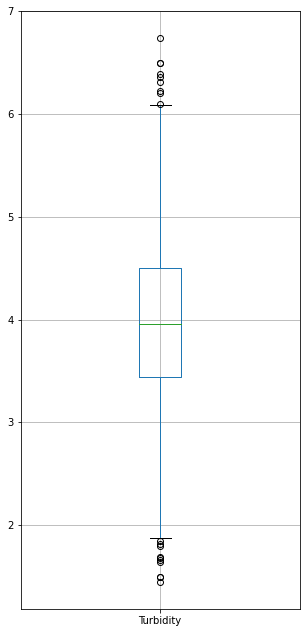

In [ ]:
plot_boxplot('Turbidity')

#### MEDIDAS DE DISTRIBUIÇÃO:
- Medidas que mostram como os valores do conjunto estão distribuídos

In [ ]:
turbidity_obliquidade = momento('Turbidity', 3)
turbidity_curtose = momento('Turbidity', 4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


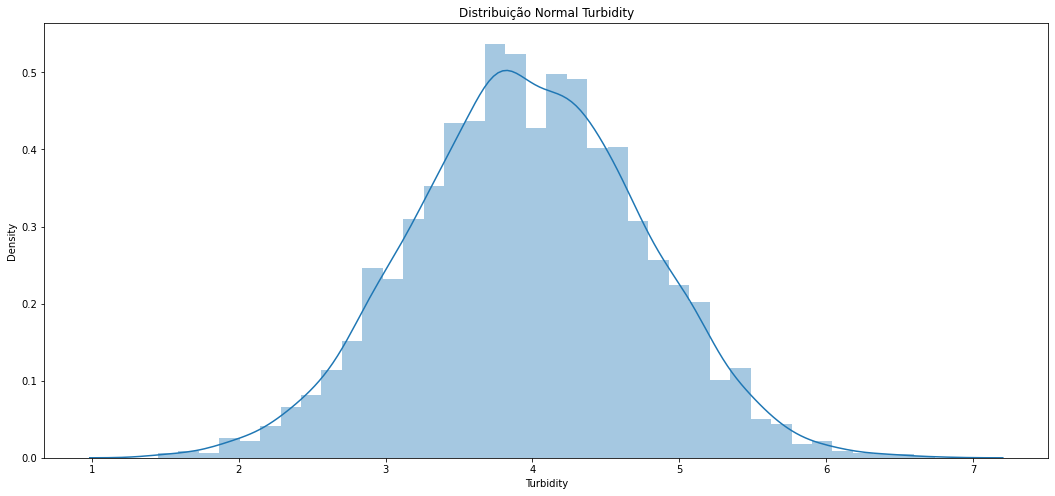

In [ ]:
plot_distribuicao('Turbidity')

## **Potability:**

Text(0.5, 1.0, 'Gráfico de pizza (Atributo alvo)')

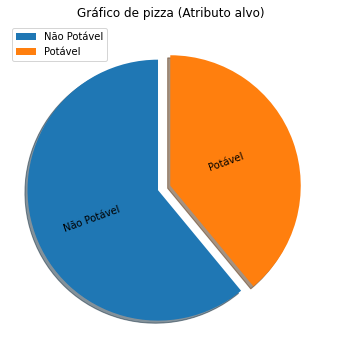

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(dataset['Potability'].value_counts(), explode=[0.1, 0], labels=['Não Potável', 'Potável'], 
        shadow=True, labeldistance=0.3, startangle=90, rotatelabels=True)

plt.legend()
plt.title('Gráfico de pizza (Atributo alvo)')

# **ORGANIZANDO AS INFORMAÇÕES PARA VISUALIZAÇÃO**
- OBS: Dados Univariados

In [ ]:
import pandas as pd

df_dadosUnivariados = pd.DataFrame({
        #'Métricas':['Media', 'Mediana', 'Média_Trunc', 'Intervalo', 'Variancia', 'Desvio_P', 'Obliquidade', 'Curtose'],
        'ph':[ph_media, ph_mediana, ph_mediaTruncada_10, ph_intervalo, ph_variancia, ph_desvioPadrao, ph_obliquidade, ph_curtose],
        'Hardness':[hardness_media, hardness_mediana, hardness_mediaTruncada_10, hardness_intervalo, hardness_variancia, hardness_desvioPadrao, hardness_obliquidade, hardness_curtose],
        'Solids':[solids_media, solids_mediana, solids_mediaTruncada, solids_intervalo, solids_variancia, solids_DesvioPadrao, solids_obliquidade, solids_curtose],
        'Chloramines':[chloramines_media, chloramines_mediana, chloramines_mediaTruncada, chloramines_intervalo, chloramines_variancia, chloramines_desvioPadrao, chloramines_obliquidade, chloramines__curtose],
        'Sulfate':[sulfate_media, sulfate_mediana, sulfate_mediaTruncada, sulfate_intervalo, sulfate_variancia, sulfate_desvioPadrao, sulfate_obliquidade, sulfate_curtose],
        'Conductivity':[conductivity_media, conductivity_mediana, conductivity_mediaTruncada, conductivity_intervalo, conductivity_variancia, conductivity_desvioPadrao, conductivity_obliquidade, conductivity_curtose],
        'Organic_carbon':[organicCarbon_media, organicCarbon_mediana, organicCarbon_mediaTruncada, organicCarbon_intervalo, organicCarbon_variancia, organicCarbon_desvioPadrao, organicCarbon_obliquidade, organicCarbon_curtose],
        'Trihalomethanes':[trihalomethanes_media, trihalomethanes_mediana, trihalomethanes_mediaTruncada, trihalomethanes_intervalo, trihalomethanes_variancia, trihalomethanes_desvioPadrao, trihalomethanes_obliquidade, trihalomethanes_curtose],
        'Turbidity':[turbidity_media, turbidity_mediana, turbidity_mediaTruncada, turbidity_intervalo, turbidity_variancia, turbidity_desvioPadrao, turbidity_obliquidade, turbidity_curtose],
}, index=['Media', 'Mediana', 'Média_Trunc', 'Intervalo', 'Variancia', 'Desvio_P', 'Obliquidade', 'Curtose'])
#
df_dadosUnivariados

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Media,7.080795,196.369496,2.201409e+04,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
Mediana,7.080795,196.967627,2.092783e+04,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028
Média_Trunc,7.061113,196.506886,2.191170e+04,7.110500,333.964759,426.824765,14.285841,66.429594,3.962809
Intervalo,14.000000,275.692000,6.090625e+04,12.775000,352.030642,571.858866,26.100000,123.262000,5.289000
Variancia,2.160771,1081.078715,7.688783e+07,2.506158,1306.288414,6532.529330,10.943936,248.689155,0.608997
Desvio_P,1.469956,32.879761,8.768571e+03,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382
Obliquidade,0.314934,0.000028,1.483700e-12,0.252127,0.000021,0.000002,0.027629,0.000255,2.104797
Curtose,-2.785753,-2.999999,-3.000000e+00,-2.840737,-2.999999,-3.000000,-2.991648,-2.999984,-0.302865


In [ ]:
df_dadosUnivariados.to_csv('/content/drive/MyDrive/dadosUnivariados.csv')

### PLOT POR LINHA:


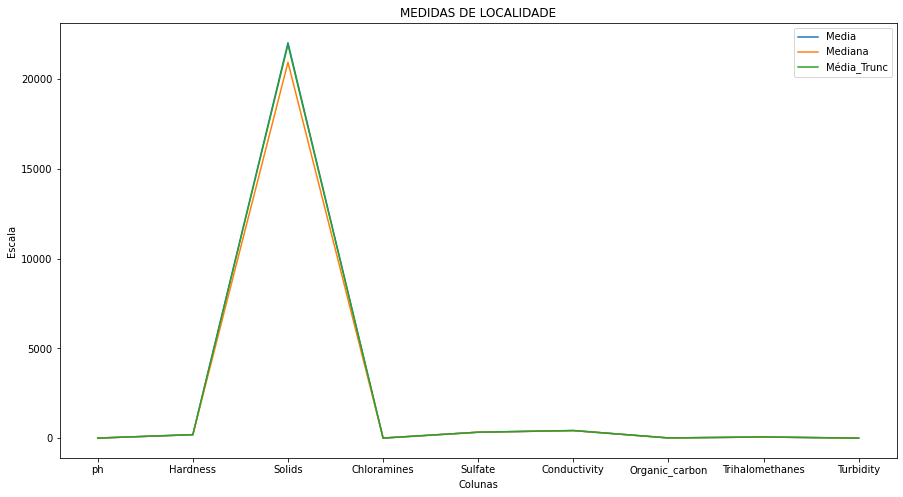

In [ ]:
#subpoot do matplotlib
plot_linha("MEDIDAS DE LOCALIDADE", 0, 1, 2)

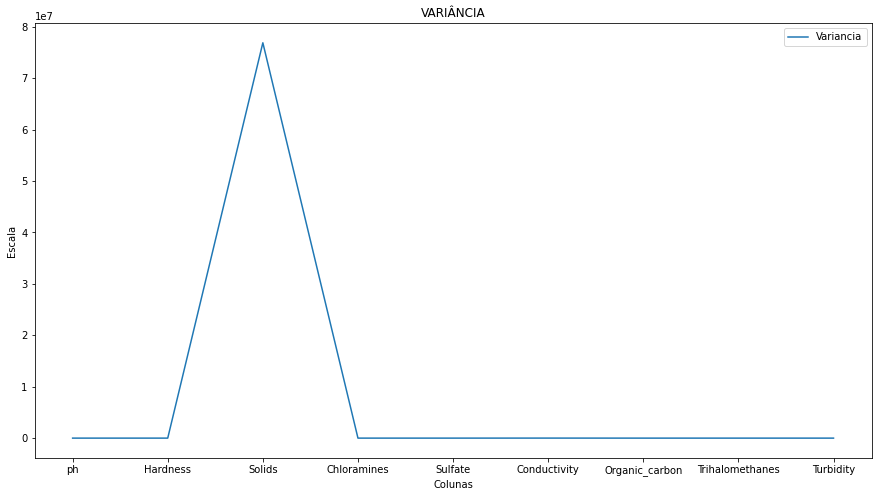

In [ ]:
plot_linha("VARIÂNCIA", 4)

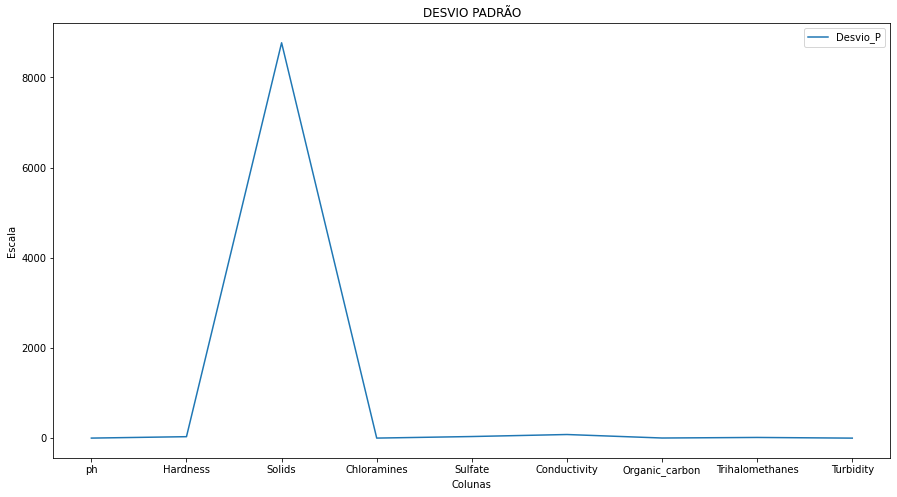

In [ ]:
plot_linha("DESVIO PADRÃO", 5)

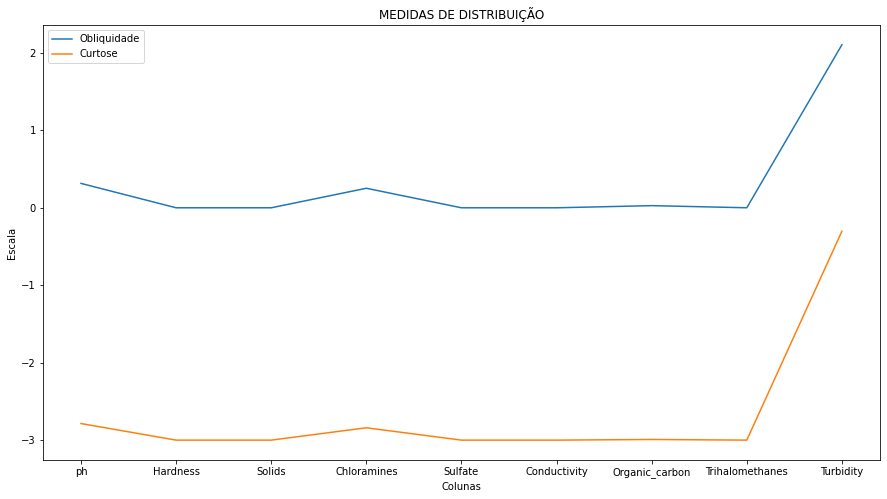

In [ ]:
plot_linha("MEDIDAS DE DISTRIBUIÇÃO", 6, 7)

### PLOT POR COLUNA:


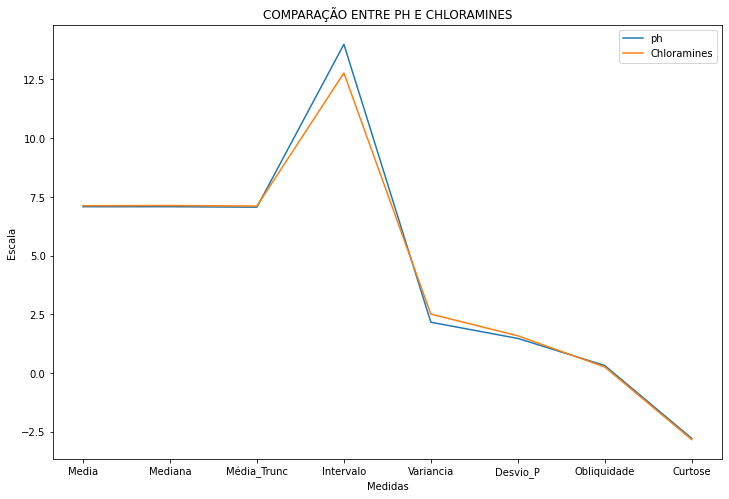

In [ ]:
plot_coluna(titulo='COMPARAÇÃO ENTRE PH E CHLORAMINES', coluna1='ph', coluna2='Chloramines')

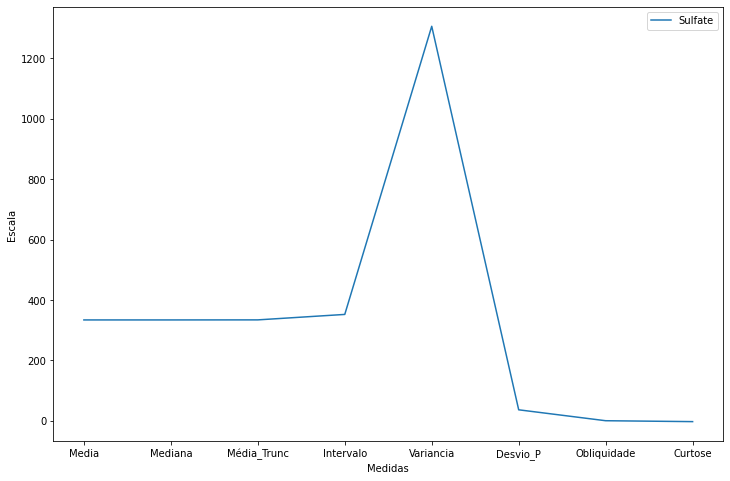

In [ ]:
plot_coluna(coluna1='Sulfate') #

# **EXPLORAÇÃO DE DADOS PARA DADOS MULTIVARIADOS**

#### MATRIZ DE COVARIÂNCIA:
- Covariância entre dois atributos medem o grau com que os atributos variam juntos, ou também, mede a relação linear entre duas variáveis;
- Na matriz de covariância, cada elemento é a covariância entre dois atributos;

In [ ]:
#mostrar matriz com heatmap
matriz_cov = dataset.cov()
matriz_cov

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,2.160771,3.665148,-1.055433e+03,-0.074026,0.765186,2.042492,0.194811,0.069405,-0.041551,-0.002357
Hardness,3.665148,1081.078715,-1.352149e+04,-1.564367,-110.239624,-63.552473,0.392670,-6.579802,-0.370747,-0.221943
Solids,-1055.432944,-13521.486526,7.688783e+07,-973.746052,-47487.109765,9802.117116,297.108377,-1227.205758,133.751106,144.345121
Chloramines,-0.074026,-1.564367,-9.737461e+02,2.506158,1.361250,-2.621264,-0.066268,0.415084,0.002920,0.018365
Sulfate,0.765186,-110.239624,-4.748711e+04,1.361250,1306.288414,-41.069488,3.217409,-14.593967,-0.276139,-0.363559
Conductivity,2.042492,-63.552473,9.802117e+03,-2.621264,-41.069488,6532.529330,5.605967,1.599718,0.365712,-0.320499
Organic_carbon,0.194811,0.392670,2.971084e+02,-0.066268,3.217409,5.605967,10.943936,-0.676942,-0.070499,-0.048419
Trihalomethanes,0.069405,-6.579802,-1.227206e+03,0.415084,-14.593967,1.599718,-0.676942,248.689155,-0.264610,0.053547
Turbidity,-0.041551,-0.370747,1.337511e+02,0.002920,-0.276139,0.365712,-0.070499,-0.264610,0.608997,0.000602
Potability,-0.002357,-0.221943,1.443451e+02,0.018365,-0.363559,-0.320499,-0.048419,0.053547,0.000602,0.237997


Text(0.5, 1.0, 'Mapa Térmico da Covariância')

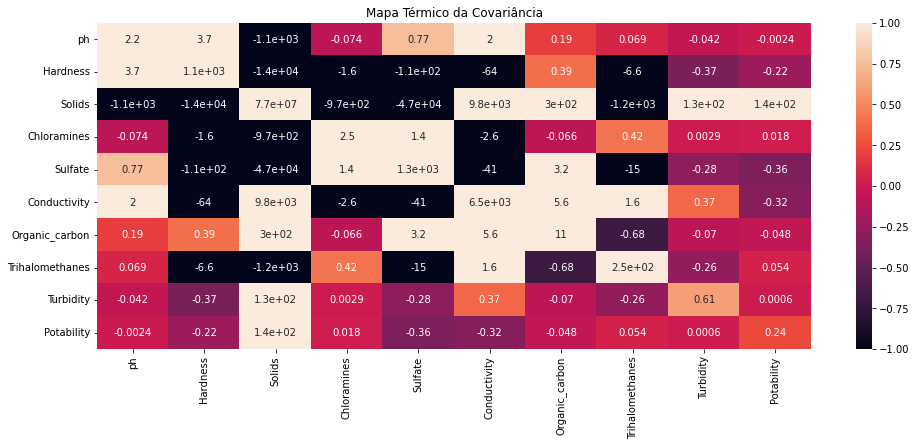

In [ ]:
plt.figure(figsize=(16,6))
heatmap_cov = sns.heatmap(matriz_cov, vmin=-1, vmax=1, annot=True)
plt.title('Mapa Térmico da Covariância')

#### MATRIZ DE CORRELAÇÃO:
- Correlação mede tanto a força como a direção da relação linear entre duas variáveis, e também, é uma medida que elimina o problema da influência da dimensão;
- A correlação é mais utilizada para analisar dados multivariados;
- Na matriz de correlação, cada elemento é a correlação entre dois atributos;

In [ ]:
#mostrar matriz com heatmap
matriz_corr = dataset.corr()
matriz_corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


Text(0.5, 1.0, 'Mapa Térmico da Correlação')

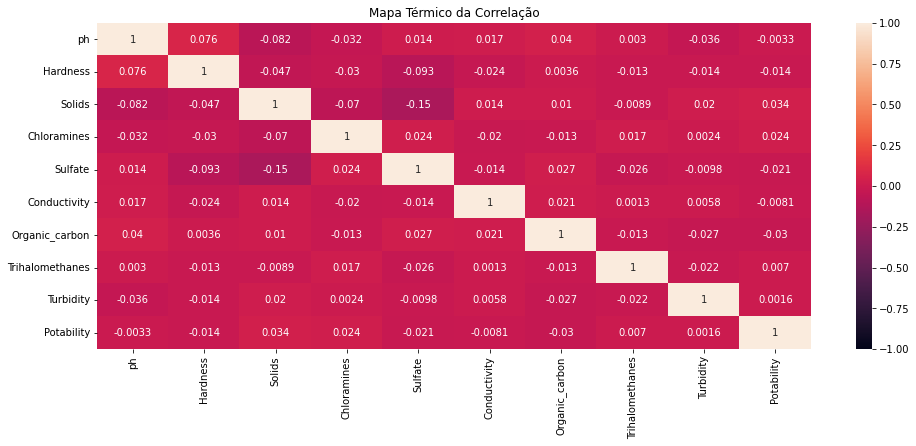

In [ ]:
plt.figure(figsize=(16,6))

heatmap_corr = sns.heatmap(matriz_corr, vmin=-1, vmax=1, annot=True)
plt.title('Mapa Térmico da Correlação')

#correlação baixa de todos atributos significa que todos tem uma importancia e significado (um não é igual ao outro)
#voltar escala para -1 e 1
#preferencialmente a correlação entre os atributos e o atributo alvo deve ser alta

Text(0.5, 1.0, 'Mapa Térmico da Correlação Triangular')

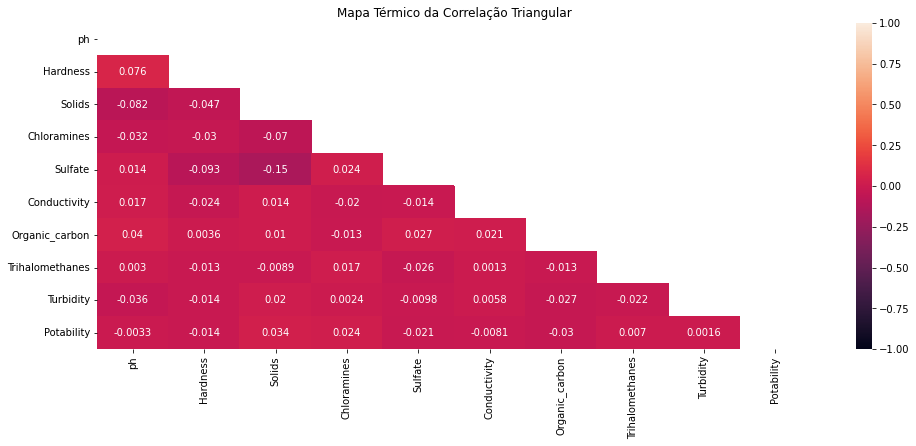

In [ ]:
plt.figure(figsize=(16,6))

mask = np.triu(np.ones_like(matriz_corr, dtype=np.bool))

heatmap_corr = sns.heatmap(matriz_corr, mask=mask, vmin=-1, vmax=1, annot=True)
plt.title('Mapa Térmico da Correlação Triangular')

#### SCATTER PLOT (PAIRPLOT):
- Gráfico para visualização de todas as relações entre dois atributos;
- Também chamado de matriz de scatter plot;
- Ajuda a ver se os dados estão sobrepostos.
- Também ajuda a ver a escala de cada atributo (dependendo do algoritmo escolhido, é necessário fazer uma normalização na escala dos dados)

In [ ]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

X = dataset.drop(['Potability'], axis=1)
y = dataset.Potability

scaler = StandardScaler().fit(X)
X_= scaler.transform(X)

dataset_normalizer = pd.DataFrame(data=X_,
                    columns=['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'])

dataset_normalizer['Potability']=y
dataset_normalizer

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-8.460387e-15,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298,0
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,-1.572994e-15,2.062575,0.270597,-0.638480,0.684218,0
2,6.928678e-01,0.847665,-0.240047,1.360594,-1.572994e-15,-0.094032,0.781117,0.001509,-1.167365,0
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412,0
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,7.242640e-01,1.240155,-0.118075,0.018481,0.601124,1
3272,4.953704e-01,-0.085667,-0.534295,0.593290,-1.572994e-15,-0.417706,1.698560,0.000000,-1.497627,1
3273,1.591254e+00,-0.626829,1.270810,0.144017,-1.572994e-15,0.072263,-0.981329,0.218748,-0.856007,1
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,-1.572994e-15,-0.288597,-0.942064,0.703468,0.950797,1


- Sem Normalização:

In [ ]:
sns.pairplot(dataset, hue='Potability')

#normalização por média 0 e desvio padrão 1
#PCA (encontra a variancia nos atributos)
#Normalizar antes de plotar
#Sulfato x Sulfato está bem fino por ter tido muitos dados faltantes

- Com Normalização:

In [ ]:
#plt.figure(figsize=(18,18))
sns.pairplot(dataset_normalizer, hue='Potability')